In [12]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("reddit_data.csv")

In [14]:
analyzer = SentimentIntensityAnalyzer()

df['text'] = df['text'].astype(str)

df['vader_score'] = df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

def label_sentiment(score):
    if score >= 0.02:
        return 'positive'
    elif score <= -0.02:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['vader_score'].apply(label_sentiment)

In [15]:
sentiment_counts = df.groupby(['subreddit', 'year', 'vader_sentiment']) \
                     .size().reset_index(name='count')

In [16]:
sentiment_by_year = df.groupby('year')['vader_score'].mean().reset_index()


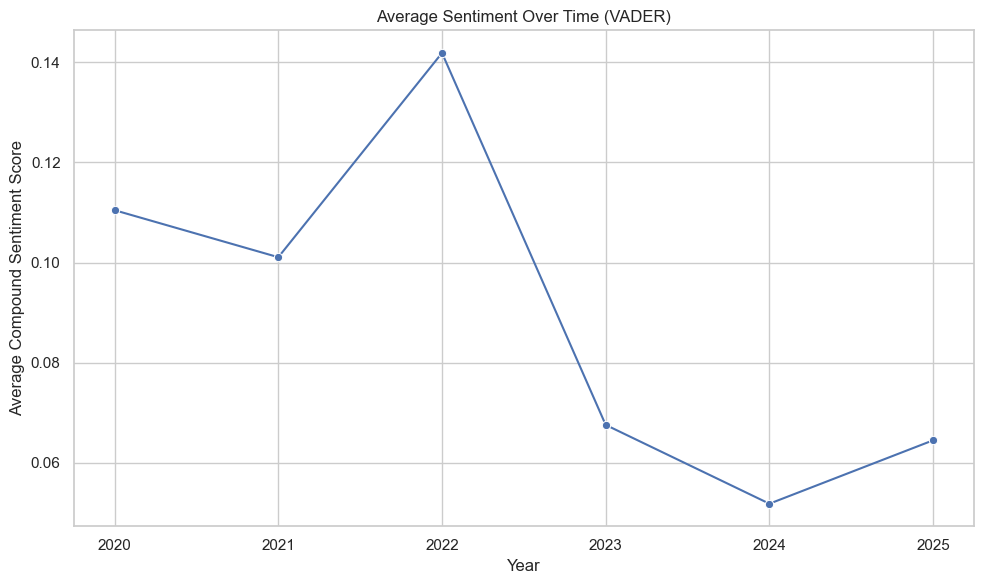

In [17]:


plt.figure(figsize=(10, 6))
sns.lineplot(data=sentiment_by_year, x='year', y='vader_score', marker='o')
plt.title("Average Sentiment Over Time (VADER)")
plt.xlabel("Year")
plt.ylabel("Average Compound Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Group by subreddit (game) and year, then calculate average score and distribution
sentiment_summary = df.groupby(['subreddit', 'year']).agg(
    avg_vader_score=('vader_score', 'mean'),
    num_posts=('vader_score', 'count'),
    num_positive=('vader_sentiment', lambda x: (x == 'positive').sum()),
    num_negative=('vader_sentiment', lambda x: (x == 'negative').sum()),
    num_neutral=('vader_sentiment', lambda x: (x == 'neutral').sum())
).reset_index()

In [19]:
print(sentiment_summary)

     subreddit  year  avg_vader_score  num_posts  num_positive  num_negative  \
0   callofduty  2020         0.056458       1000           356           248   
1   callofduty  2021         0.053566       1000           346           242   
2   callofduty  2022         0.062247       1000           360           258   
3   callofduty  2023         0.025584       1000           308           264   
4   callofduty  2024        -0.006752       1000           274           275   
..         ...   ...              ...        ...           ...           ...   
61    valorant  2021         0.087077       1000           399           275   
62    valorant  2022         0.132049       1000           424           224   
63    valorant  2023         0.025548       1000           322           271   
64    valorant  2024         0.024722       1000           316           259   
65    valorant  2025         0.097220       1000           379           175   

    num_neutral  
0           396  
1  

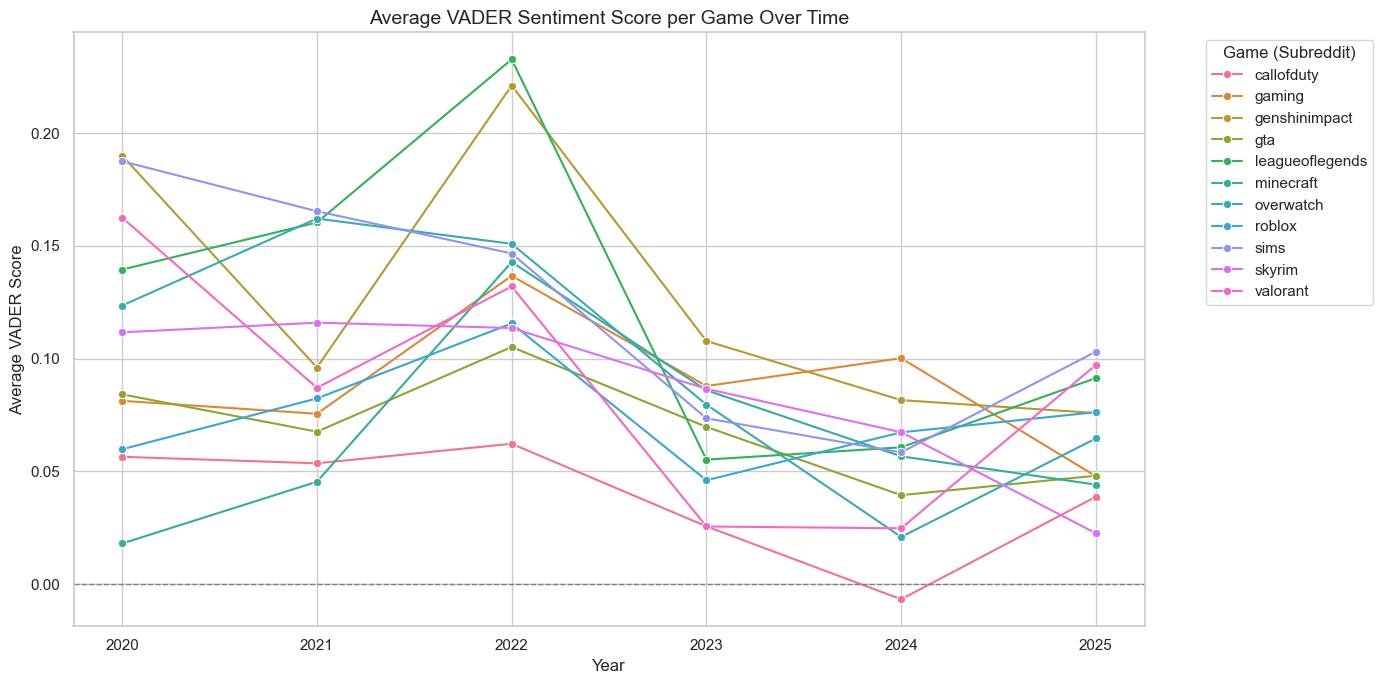

In [20]:
# Set up the plot style
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Create the lineplot
sns.lineplot(
    data=sentiment_summary,
    x='year',
    y='avg_vader_score',
    hue='subreddit',
    marker='o'
)

# Chart title and labels
plt.title("Average VADER Sentiment Score per Game Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average VADER Score")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.legend(title="Game (Subreddit)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1400x700 with 0 Axes>

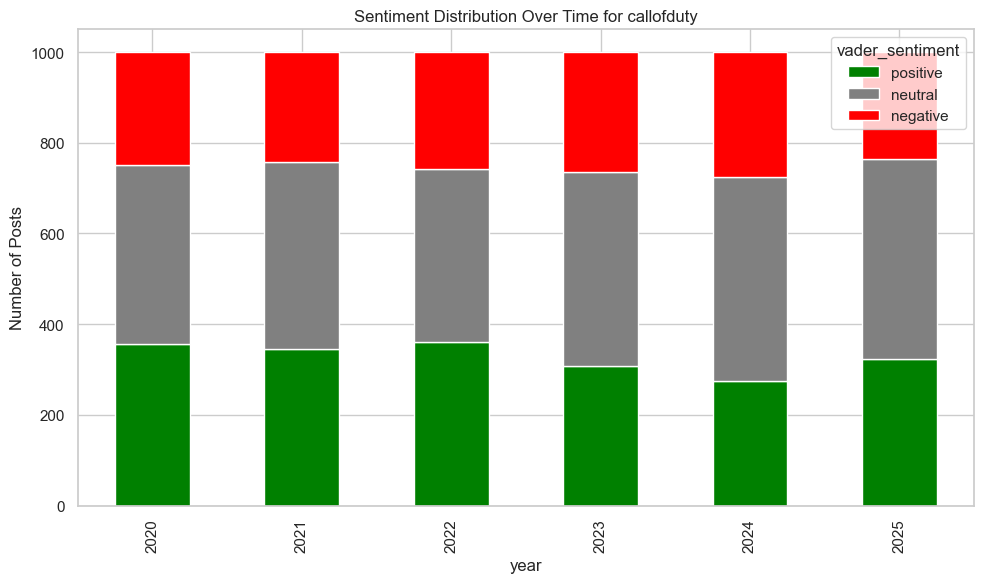

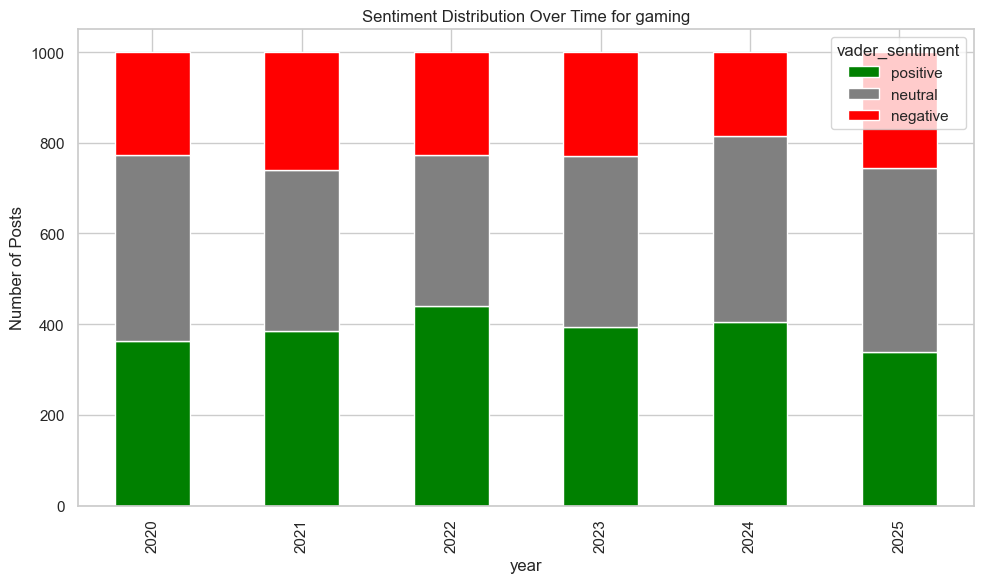

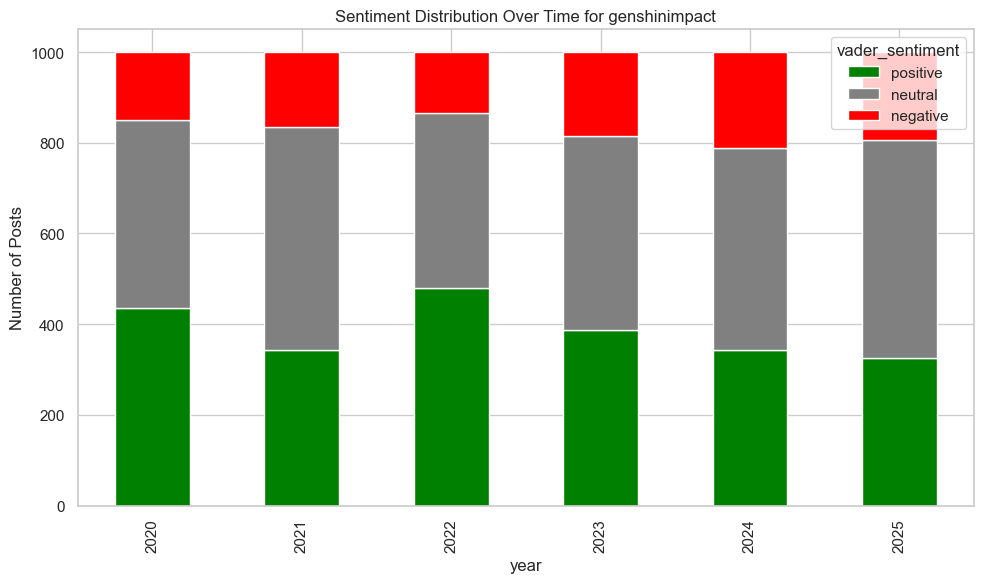

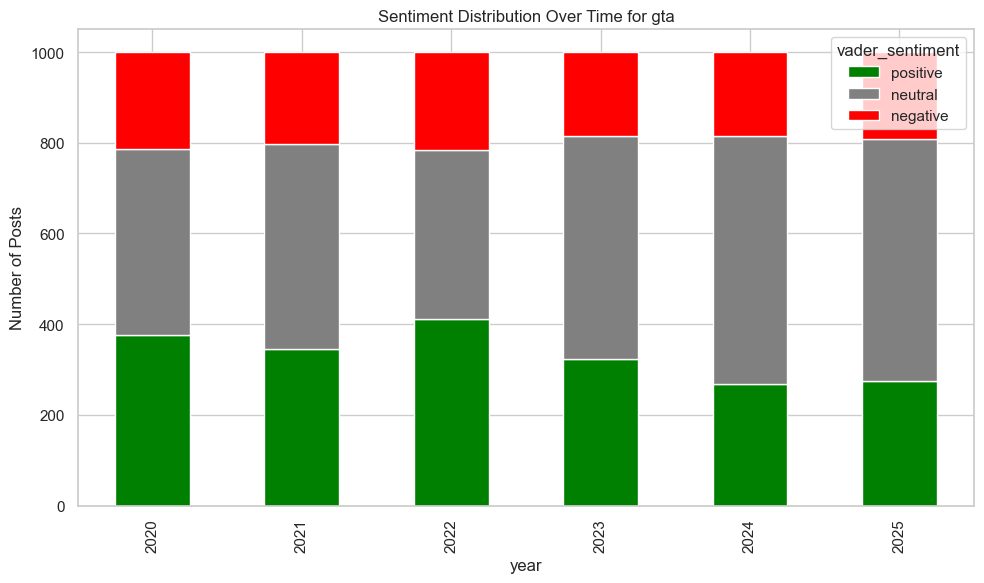

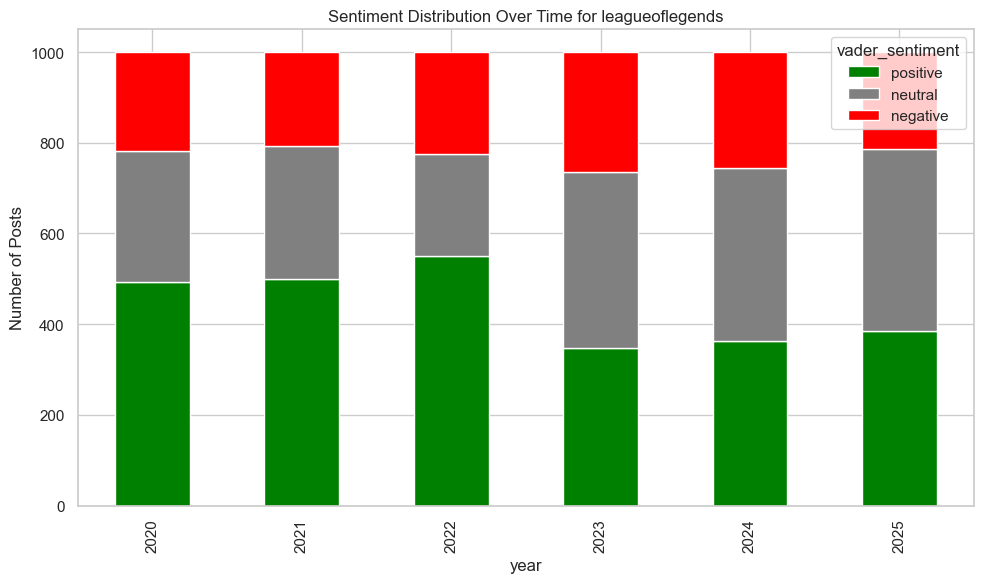

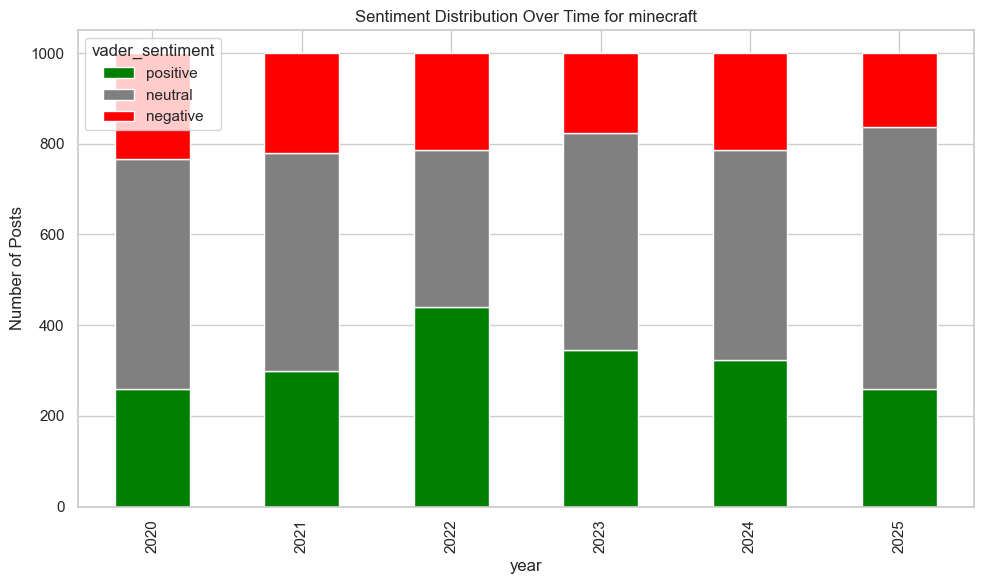

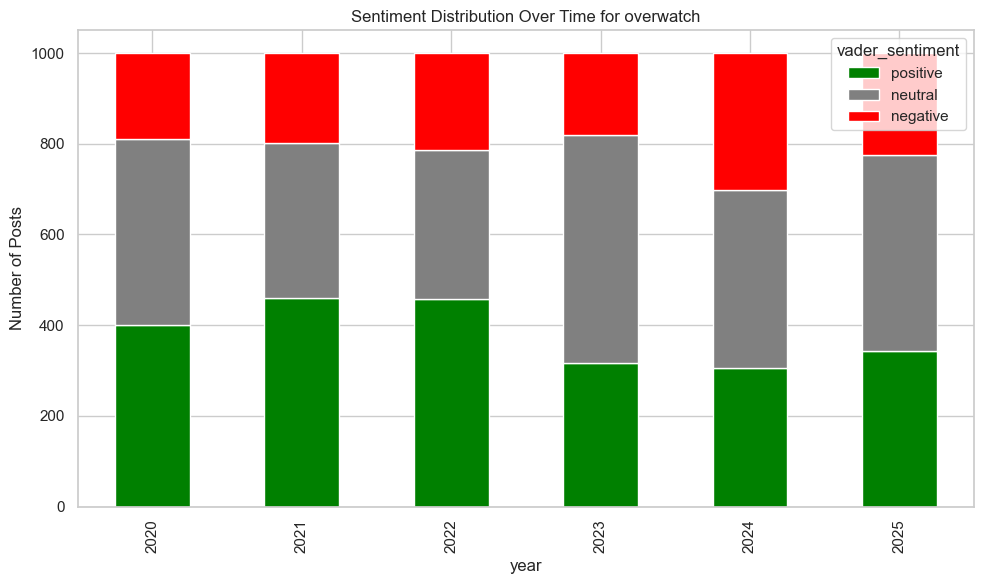

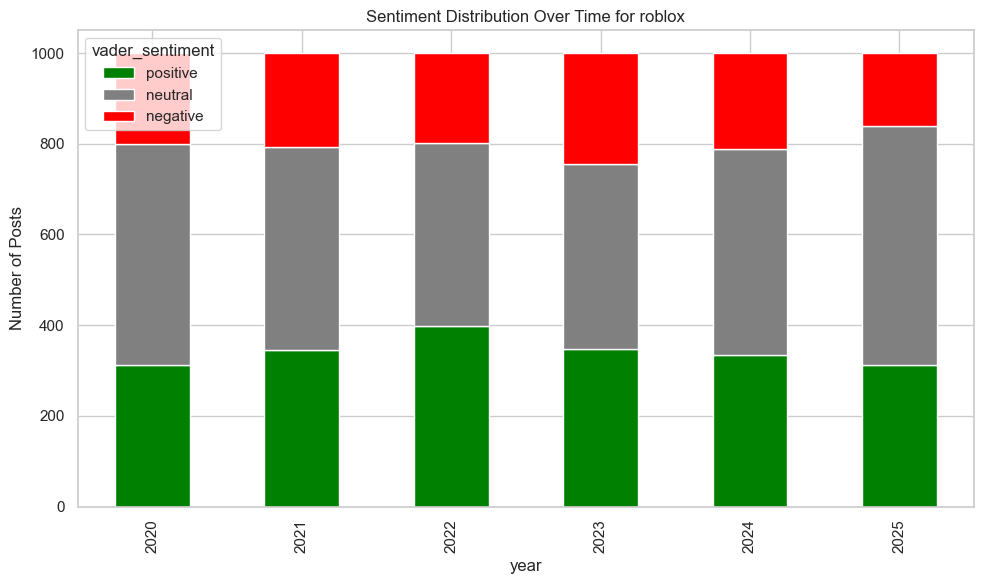

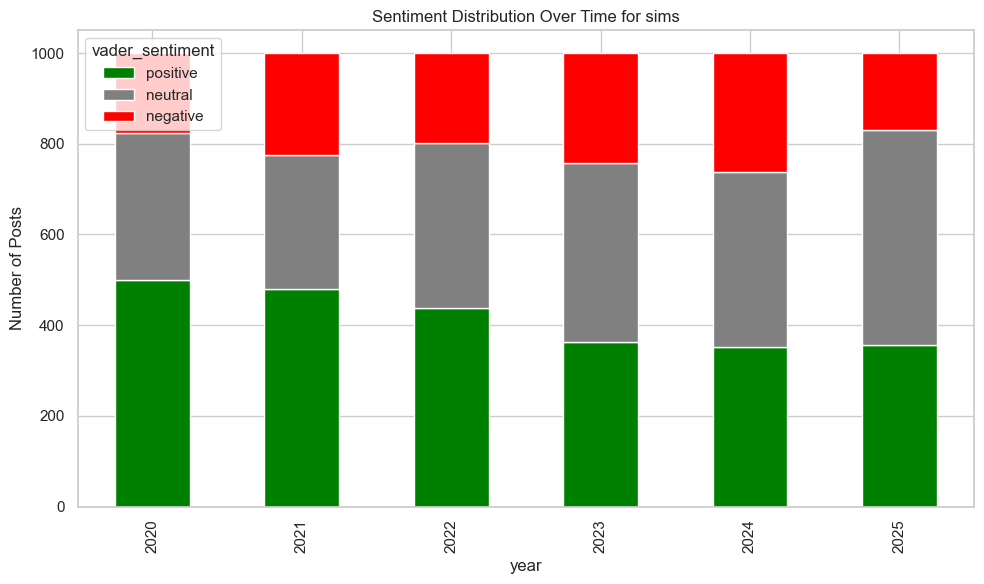

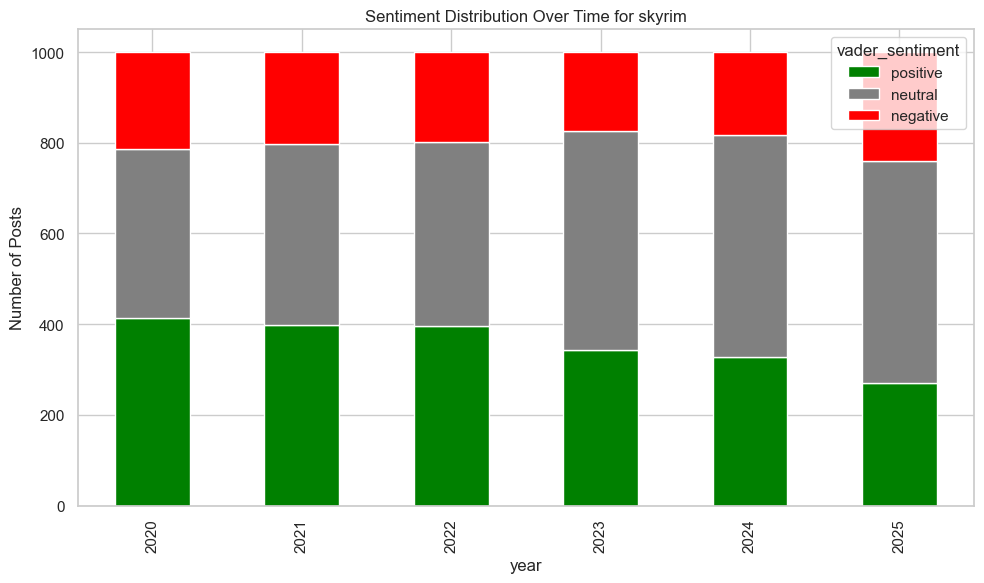

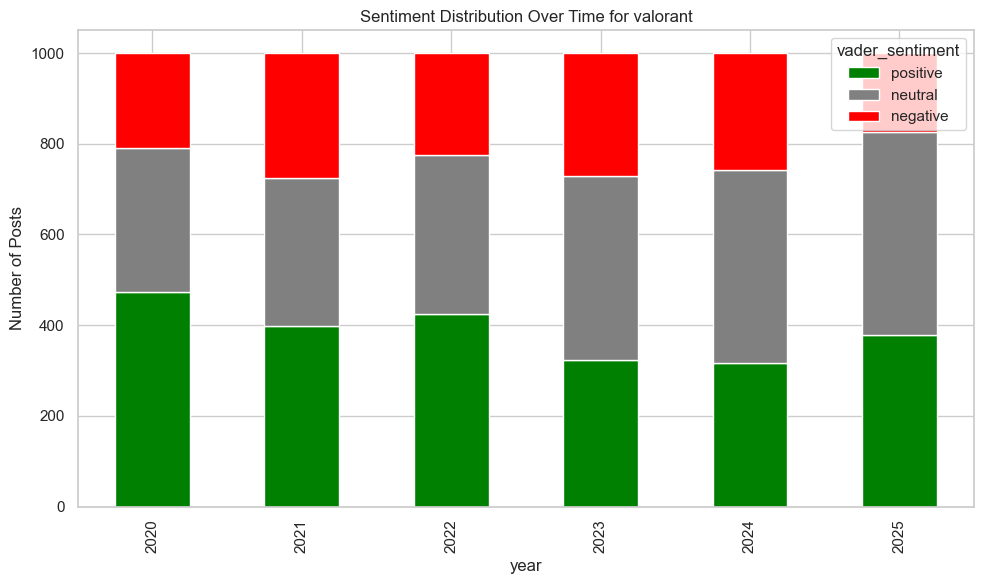

In [21]:
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")

# Pivot for stacked bar plot
pivot_df = sentiment_counts.pivot_table(index=['subreddit', 'year'], 
                                        columns='vader_sentiment', 
                                        values='count', 
                                        fill_value=0).reset_index()

# Plot for each game
games = pivot_df['subreddit'].unique()
for game in games:
    game_df = pivot_df[pivot_df['subreddit'] == game]
    colors = {'positive': 'green', 'neutral': 'gray', 'negative': 'red'}
    ax = game_df.set_index('year')[['positive', 'neutral', 'negative']].plot(
        kind='bar',
        stacked=True,
        color=[colors['positive'], colors['neutral'], colors['negative']],
        figsize=(10, 6),
        title=f"Sentiment Distribution Over Time for {game}",
        ylabel="Number of Posts"
    )
    plt.tight_layout()
    plt.show()

In [22]:
for game in sentiment_counts['subreddit'].unique():
    print(f"\n Sentiment Counts for {game}")
    game_df = sentiment_counts[sentiment_counts['subreddit'] == game]
    for year in sorted(game_df['year'].unique()):
        year_df = game_df[game_df['year'] == year]
        print(f"  Year {year}:")
        for sentiment in ['positive', 'neutral', 'negative']:
            count = year_df[year_df['vader_sentiment'] == sentiment]['count'].sum()
            print(f"    {sentiment.capitalize()}: {count}")


 Sentiment Counts for callofduty
  Year 2020:
    Positive: 356
    Neutral: 396
    Negative: 248
  Year 2021:
    Positive: 346
    Neutral: 412
    Negative: 242
  Year 2022:
    Positive: 360
    Neutral: 382
    Negative: 258
  Year 2023:
    Positive: 308
    Neutral: 428
    Negative: 264
  Year 2024:
    Positive: 274
    Neutral: 451
    Negative: 275
  Year 2025:
    Positive: 322
    Neutral: 443
    Negative: 235

 Sentiment Counts for gaming
  Year 2020:
    Positive: 363
    Neutral: 411
    Negative: 226
  Year 2021:
    Positive: 384
    Neutral: 357
    Negative: 259
  Year 2022:
    Positive: 439
    Neutral: 334
    Negative: 227
  Year 2023:
    Positive: 393
    Neutral: 378
    Negative: 229
  Year 2024:
    Positive: 405
    Neutral: 410
    Negative: 185
  Year 2025:
    Positive: 339
    Neutral: 406
    Negative: 255

 Sentiment Counts for genshinimpact
  Year 2020:
    Positive: 436
    Neutral: 415
    Negative: 149
  Year 2021:
    Positive: 342
    Neutra